In [31]:
# 데이터 가져오기

raw_data = pd.read_csv('../../1. raw_data/KRI-DAC_Jeju_data5.txt', sep=',')
raw_data.tail()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
273178,273179,273179,202005,제주특별자치도,제주시,중소,침구수예점,x시,17000,0,1,0,949616.6171,1.502505e+06
273179,273180,273180,202005,제주특별자치도,제주시,중소1,서양음식,x시,12000,0,1,0,949665.1566,1.502805e+06
273180,273181,273181,202005,제주특별자치도,제주시,영세,편의점,x시,4800,0,1,0,950266.5976,1.502458e+06
273181,273182,273182,202005,제주특별자치도,제주시,중소,제과점,x시,25000,0,2,0,950524.6587,1.500760e+06
273182,273183,273183,202005,제주특별자치도,제주시,영세,서양음식,x시,6000,0,1,0,950674.5989,1.500760e+06


In [32]:
df = raw_data.copy()

In [33]:
from pyproj import Proj, transform

# ITRF좌표계
proj_ITRF = Proj(init='epsg:5179')
# WGS 좌표계 
proj_WGS84 = Proj(init='epsg:4326')


In [34]:
# 변환 예시 
x1, y1 = 961114.519726,1727112.269174
x2, y2 = transform(proj_ITRF, proj_WGS84, x1, y1)
x2, y2

(127.07103374451121, 35.53921546645965)

In [35]:
df['lon'], df['lat'] = transform(proj_ITRF, proj_WGS84, df['POINT_X'], df['POINT_Y'])
df.tail()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat
273178,273179,273179,202005,제주특별자치도,제주시,중소,침구수예점,x시,17000,0,1,0,949616.6171,1.502505e+06,126.957495,33.513247
273179,273180,273180,202005,제주특별자치도,제주시,중소1,서양음식,x시,12000,0,1,0,949665.1566,1.502805e+06,126.958001,33.515956
273180,273181,273181,202005,제주특별자치도,제주시,영세,편의점,x시,4800,0,1,0,950266.5976,1.502458e+06,126.964496,33.512854
273181,273182,273182,202005,제주특별자치도,제주시,중소,제과점,x시,25000,0,2,0,950524.6587,1.500760e+06,126.967369,33.497551
273182,273183,273183,202005,제주특별자치도,제주시,영세,서양음식,x시,6000,0,1,0,950674.5989,1.500760e+06,126.968983,33.497564


In [36]:
df['lon'] = df['lon'].astype(str)
df['lat'] = df['lat'].astype(str)
df['lon_lat'] = df['lon']+'_'+df['lat']
df['lon_lat'].value_counts()

126.52427851055405_33.51290574138535     400
126.52935695016222_33.49899169591379     314
126.52880376641139_33.499886709171996    309
126.47793511858133_33.48574932701181     275
126.56362561835856_33.24739705179205     258
                                        ... 
126.61973674157_33.533839907407454         1
126.47811623086326_33.475383515599056      1
126.75397178703172_33.557350919669986      1
126.30082494598244_33.95764108778818       1
126.50993684338977_33.5019153869064        1
Name: lon_lat, Length: 13820, dtype: int64

In [37]:
# ################# 좌표 정보 주소 변환 ####################
# import requests
# import json

In [38]:
# url = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x=126.968983&y=33.497564"
# headers = {"Authorization": "KakaoAK 1fecb2a27219321b92e1464ad08365fb"}

In [39]:
# api_test = requests.get(url, headers=headers)
# url_text = json.loads(api_test.text)
# url_text

In [40]:
# dongmyeon = url_text['documents'][0]['region_3depth_name']
# ri = url_text['documents'][0]['region_4depth_name']

# dongmyeon, ri 

In [41]:
# df['lon'] = df['lon'].astype(str)
# df['lat'] = df['lat'].astype(str)

In [42]:
# df['url1'] = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x=' + df['lon']
# df['url2'] = '&y=' + df['lat']
# df['url'] = df['url1'] + df['url2']

In [43]:
# df.drop(columns=['url1','url2'],axis=1,inplace=True)

In [44]:
# dong_ls = []
# ri_ls = []
# for i in df.index[:100]:
#     url = df['url'][i]
#     headers = {"Authorization": "KakaoAK 1fecb2a27219321b92e1464ad08365fb"}
#     api_test = requests.get(url, headers=headers)
#     url_text = json.loads(api_test.text)
#     dong = url_text['documents'][0]['region_3depth_name']
#     dong_ls.append(dong)

In [45]:
##############################시각화#########################

In [46]:
df[df['lon_lat']=='126.17889362710162_33.30231529076243'].head()
# 같은 좌표인 경우에도 다른 업종인 경우가 많음 

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243
4903,4904,4904,202005,제주특별자치도,제주시,영세,일반한식,01시,86500,0,3,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243
8568,8569,8569,202005,제주특별자치도,제주시,영세,일반한식,02시,208000,0,5,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243
11269,11270,11270,202005,제주특별자치도,제주시,영세,일반한식,03시,18000,0,1,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243
19121,19122,19122,202005,제주특별자치도,제주시,중소,한의원,07시,4800,0,2,0,877005.9834,1479766.073,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243


In [47]:
# 업종에 따른 folium 분포 나타내기 

In [48]:
df['FranClass'].value_counts()

영세     152294
일반      35889
중소      33211
중소1     32814
중소2     18975
Name: FranClass, dtype: int64

In [49]:
df_js2 = df[df['FranClass']=='중소2'] #중소2에 대해 추출 
df_js2 = df_js2[['SIGUNGU','FranClass','Type','lon','lat','lon_lat']] #업종별 분포 확인에 대한 정보만 추출 
df_js2.drop_duplicates(inplace=True) #중복되는 row 삭제 
df_js2 #중소2 업종 리스트 

df_js1 = df[df['FranClass']=='중소1'] #중소1에 대해 추출 
df_js1 = df_js1[['SIGUNGU','FranClass','Type','lon','lat','lon_lat']] #업종별 분포 확인에 대한 정보만 추출 
df_js1.drop_duplicates(inplace=True) #중복되는 row 삭제 
df_js1 #중소1 업종 리스트 

df_js = df[df['FranClass']=='중소'] #중소에 대해 추출 
df_js = df_js[['SIGUNGU','FranClass','Type','lon','lat','lon_lat']] #업종별 분포 확인에 대한 정보만 추출 
df_js.drop_duplicates(inplace=True) #중복되는 row 삭제 
df_js #중소 업종 리스트 

df_gn = df[df['FranClass']=='일반'] #일반에 대해 추출 
df_gn = df_gn[['SIGUNGU','FranClass','Type','lon','lat','lon_lat']] #업종별 분포 확인에 대한 정보만 추출 
df_gn.drop_duplicates(inplace=True) #중복되는 row 삭제 
df_gn #일반 업종 리스트 

df_ys = df[df['FranClass']=='영세'] #중소에 대해 추출 
df_ys = df_ys[['SIGUNGU','FranClass','Type','lon','lat','lon_lat']] #업종별 분포 확인에 대한 정보만 추출 
df_ys.drop_duplicates(inplace=True) #중복되는 row 삭제 
df_ys #중소 업종 리스트 

,SIGUNGU,FranClass,Type,lon,lat,lon_lat
0,제주시,영세,일반한식,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243
1,제주시,영세,단란주점,126.17888426813494,33.302765922881875,126.17888426813494_33.302765922881875
3,제주시,영세,편의점,126.17943027296923,33.30232314934195,126.17943027296923_33.30232314934195
4,제주시,영세,주점,126.17941155823847,33.30322441283756,126.17941155823847_33.30322441283756
5,제주시,영세,스넥,126.18102151237558,33.3032479753176,126.18102151237558_33.3032479753176
...,...,...,...,...,...,...
268814,서귀포시,영세,기타숙박업,126.30957647197593,33.23428902334641,126.30957647197593_33.23428902334641
269294,제주시,영세,피부미용실,126.43102865310969,33.49147577780778,126.43102865310969_33.49147577780778
269435,서귀포시,영세,기타숙박업,126.46571021256327,33.2629083000071,126.46571021256327_33.2629083000071
269698,제주시,영세,정장,126.4780768663447,33.47763695457516,126.4780768663447_33.47763695457516


In [50]:
#############folium을 통한 표현############ 
import pandas as pd 
import folium
from folium.plugins import MarkerCluster, MiniMap

In [51]:
map_jeju = folium.Map((33.38773221915759, 126.54124720118492), zoom_start= 13)
mc = MarkerCluster()

mc.add_child(folium.Marker(location=[33.48908804243811,126.49294055515932], popup='중소2', icon=folium.Icon(color='red')))

# minimap = MiniMap()
# map_jeju.add_child(minimap)

# map_jeju.add_child(mc)

In [52]:
map = folium.Map((33.38773221915759, 126.54124720118492), zoom_start= 13)

# 중소2 서클 추가 
for i in range(len(df_js2['FranClass'])):
    folium.Circle(list(df_js2.iloc[i][['lat','lon']]), radius=5, color = '#e41a1c',fill_color = '#e41a1c').add_to(map)

# 중소1 서클 추가 
for i in range(len(df_js1['FranClass'])):
    folium.Circle(list(df_js1.iloc[i][['lat','lon']]), radius=5, color = '#377eb8',fill_color = '#377eb8').add_to(map)

# 중소 서클 추가 
for i in range(len(df_js['FranClass'])):
    folium.Circle(list(df_js.iloc[i][['lat','lon']]), radius=5, color = '#4daf4a',fill_color = '#4daf4a').add_to(map)

# 일반 서클 추가 
for i in range(len(df_gn['FranClass'])):
    folium.Circle(list(df_gn.iloc[i][['lat','lon']]), radius=5, color = '#984ea3',fill_color = '#984ea3').add_to(map)

# 일반 서클 추가 
for i in range(len(df_ys['FranClass'])):
    folium.Circle(list(df_ys.iloc[i][['lat','lon']]), radius=5, color = '#ff7f00',fill_color = '#ff7f00').add_to(map)    


map
map.save('map_all.html')

In [53]:
map = folium.Map((33.38773221915759, 126.54124720118492), zoom_start= 10)

# 중소2 서클 추가 
for i in range(len(df_js2['FranClass'])):
    folium.Circle(list(df_js2.iloc[i][['lat','lon']]), radius=5, color = '#e41a1c',fill_color = '#e41a1c').add_to(map)

# # 중소1 서클 추가 
# for i in range(len(df_js1['FranClass'])):
#     folium.Circle(list(df_js1.iloc[i][['lat','lon']]), radius=5, color = '#d7b5d8',fill_color = '#d7b5d8').add_to(map)

# # 중소 서클 추가 
# for i in range(len(df_js['FranClass'])):
#     folium.Circle(list(df_js.iloc[i][['lat','lon']]), radius=5, color = '#df65b0',fill_color = '#df65b0').add_to(map)

# # 일반 서클 추가 
# for i in range(len(df_gn['FranClass'])):
#     folium.Circle(list(df_gn.iloc[i][['lat','lon']]), radius=5, color = '#dd1c77',fill_color = '#dd1c77').add_to(map)

# # 영세 서클 추가 
# for i in range(len(df_ys['FranClass'])):
#     folium.Circle(list(df_ys.iloc[i][['lat','lon']]), radius=5, color = '#980043',fill_color = '#980043').add_to(map)    


# map
# map.save('map_all.html')

In [55]:
########### 주소 가져오기 ############ 
# 1. 중복 위도 경도 삭제 
# 2. 유니크 값만 주소 API 로 데이터 가져오기 
# 3. DF 와 merge 시키기 

df.head()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243
1,2,2,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06,126.17888426813494,33.302765922881875,126.17888426813494_33.302765922881875
2,3,3,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06,126.17945834265305,33.30097125427593,126.17945834265305_33.30097125427593
3,4,4,202005,제주특별자치도,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06,126.17943027296923,33.30232314934195,126.17943027296923_33.30232314934195
4,5,5,202005,제주특별자치도,제주시,영세,주점,00시,66000,0,2,0,877055.4817,1.479866e+06,126.17941155823847,33.30322441283756,126.17941155823847_33.30322441283756


In [56]:
# 1. 중복 위도 경도 삭제 
df_uniq = df.drop_duplicates('lon_lat')
df_uniq.value_counts('lon_lat')

lon_lat
126.96951006044938_33.49847009919258     1
126.48544160292364_33.487193564199174    1
126.48541302178809_33.45789217335456     1
126.48541024967045_33.488996318122375    1
126.48539457164357_33.48989769487357     1
                                        ..
126.55718128617019_33.247773337040584    1
126.5571738871868_33.24822405800287      1
126.5571664880694_33.2486747789311       1
126.55715908882763_33.24912549892337     1
126.16370558240443_33.33544861735468     1
Length: 13820, dtype: int64

In [57]:
# 2. 유니크 좌표 값 주소 가져오기 
df_uniq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13820 entries, 0 to 271852
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OBJECTID       13820 non-null  int64  
 1   Field1         13820 non-null  int64  
 2   YM             13820 non-null  int64  
 3   SIDO           13820 non-null  object 
 4   SIGUNGU        13820 non-null  object 
 5   FranClass      13820 non-null  object 
 6   Type           13820 non-null  object 
 7   Time           13820 non-null  object 
 8   TotalSpent     13820 non-null  int64  
 9   DisSpent       13820 non-null  int64  
 10  NumofSpent     13820 non-null  int64  
 11  NumofDisSpent  13820 non-null  int64  
 12  POINT_X        13820 non-null  float64
 13  POINT_Y        13820 non-null  float64
 14  lon            13820 non-null  object 
 15  lat            13820 non-null  object 
 16  lon_lat        13820 non-null  object 
dtypes: float64(2), int64(7), object(8)
memory usage: 

In [58]:
# url 컬럼 작업 

df_uniq['url1'] = 'https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x=' + df_uniq['lon']
df_uniq['url2'] = '&y=' + df_uniq['lat']
df_uniq['url'] = df_uniq['url1'] + df_uniq['url2']


df_uniq.drop(columns=['url1','url2'],axis=1,inplace=True)
df_uniq = df_uniq.reset_index()
df_uniq.head(5)

,index,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,url
0,0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,https://dapi.kakao.com/v2/local/geo/coord2regi...
1,1,2,2,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06,126.17888426813494,33.302765922881875,126.17888426813494_33.302765922881875,https://dapi.kakao.com/v2/local/geo/coord2regi...
2,2,3,3,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06,126.17945834265305,33.30097125427593,126.17945834265305_33.30097125427593,https://dapi.kakao.com/v2/local/geo/coord2regi...
3,3,4,4,202005,제주특별자치도,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06,126.17943027296923,33.30232314934195,126.17943027296923_33.30232314934195,https://dapi.kakao.com/v2/local/geo/coord2regi...
4,4,5,5,202005,제주특별자치도,제주시,영세,주점,00시,66000,0,2,0,877055.4817,1.479866e+06,126.17941155823847,33.30322441283756,126.17941155823847_33.30322441283756,https://dapi.kakao.com/v2/local/geo/coord2regi...


In [60]:
# import requests
# import json

# dong_ls = []

# for i in range(len(df_uniq.index)):
#     url = df_uniq['url'][i]
#     headers = {"Authorization": "KakaoAK 9c01f59434bc3920843d9dd0279e6e6c"}
#     api_test = requests.get(url, headers=headers)
#     url_text = json.loads(api_test.text)
#     dong = url_text['documents'][0]['region_3depth_name']
#     dong_ls.append(dong)
# print('converted point to addr')

converted point to addr


In [61]:
# 가져온 주소값 df 변환 
dic = {'dong':dong_ls}

In [62]:
df_dong  = pd.DataFrame(dic)
df_dong.tail()

,dong
13815,안덕면
13816,이호일동
13817,하원동
13818,용담이동
13819,서홍동


In [63]:
# 3. DF 와 merge 시키기 

df_join = df_uniq.join(df_dong)

In [64]:
df_join # 5월 발생된 매출을 가진 업종에 대한 주소값 확인 

,index,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,url,dong
0,0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면
1,1,2,2,202005,제주특별자치도,제주시,영세,단란주점,00시,1180000,0,3,0,877005.7447,1.479816e+06,126.17888426813494,33.302765922881875,126.17888426813494_33.302765922881875,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면
2,2,3,3,202005,제주특별자치도,제주시,중소1,편의점,00시,157670,6850,20,2,877056.6756,1.479616e+06,126.17945834265305,33.30097125427593,126.17945834265305_33.30097125427593,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면
3,3,4,4,202005,제주특별자치도,제주시,영세,편의점,00시,46600,0,2,0,877055.9593,1.479766e+06,126.17943027296923,33.30232314934195,126.17943027296923_33.30232314934195,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면
4,4,5,5,202005,제주특별자치도,제주시,영세,주점,00시,66000,0,2,0,877055.4817,1.479866e+06,126.17941155823847,33.30322441283756,126.17941155823847_33.30322441283756,https://dapi.kakao.com/v2/local/geo/coord2regi...,한경면
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13815,268814,268815,268815,202005,제주특별자치도,서귀포시,영세,기타숙박업,x시,50000,0,1,0,889087.2224,1.472077e+06,126.30957647197593,33.23428902334641,126.30957647197593_33.23428902334641,https://dapi.kakao.com/v2/local/geo/coord2regi...,안덕면
13816,269415,269416,269416,202005,제주특별자치도,제주시,일반,건강식품(회원제형태),x시,7662600,0,12,0,903092.2237,1.501082e+06,126.45675120309421,33.49720789225105,126.45675120309421_33.49720789225105,https://dapi.kakao.com/v2/local/geo/coord2regi...,이호일동
13817,269435,269436,269436,202005,제주특별자치도,서귀포시,영세,기타숙박업,x시,240000,0,1,0,903666.4287,1.475096e+06,126.46571021256327,33.2629083000071,126.46571021256327_33.2629083000071,https://dapi.kakao.com/v2/local/geo/coord2regi...,하원동
13818,270507,270508,270508,202005,제주특별자치도,제주시,일반,기타음료식품,x시,90750,0,1,0,907738.4497,1.501454e+06,126.50672452857444,33.50097517749024,126.50672452857444_33.50097517749024,https://dapi.kakao.com/v2/local/geo/coord2regi...,용담이동


In [65]:
# # 피클로 저장하기 
# import pickle

# with open('jeju_uniq_data5.pickle', 'wb') as fw:
#     pickle.dump(df_join, fw)


In [2]:
# 피클 가져오기 
import pickle
with open('jeju_uniq_data5.pickle', 'rb') as fr:
    df_join = pickle.load(fr)

df_join

EOFError: Ran out of input

In [ ]:
# 변환된 주소값을 원본 데이터와 합치기 

In [67]:
df_addr = df_join[['lon_lat','dong']]
df_addr.tail()

,lon_lat,dong
13815,126.30957647197593_33.23428902334641,안덕면
13816,126.45675120309421_33.49720789225105,이호일동
13817,126.46571021256327_33.2629083000071,하원동
13818,126.50672452857444_33.50097517749024,용담이동
13819,126.55548315030599_33.25316331771586,서홍동


In [68]:
df.tail()

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat
273178,273179,273179,202005,제주특별자치도,제주시,중소,침구수예점,x시,17000,0,1,0,949616.6171,1.502505e+06,126.95749518388968,33.51324665784147,126.95749518388968_33.51324665784147
273179,273180,273180,202005,제주특별자치도,제주시,중소1,서양음식,x시,12000,0,1,0,949665.1566,1.502805e+06,126.95800093548306,33.51595579736336,126.95800093548306_33.51595579736336
273180,273181,273181,202005,제주특별자치도,제주시,영세,편의점,x시,4800,0,1,0,950266.5976,1.502458e+06,126.96449620673,33.51285447500652,126.96449620673_33.51285447500652
273181,273182,273182,202005,제주특별자치도,제주시,중소,제과점,x시,25000,0,2,0,950524.6587,1.500760e+06,126.96736859949111,33.497550664200574,126.96736859949111_33.497550664200574
273182,273183,273183,202005,제주특별자치도,제주시,영세,서양음식,x시,6000,0,1,0,950674.5989,1.500760e+06,126.96898269451708,33.49756408518746,126.96898269451708_33.49756408518746


In [69]:
df_final = pd.merge(df, df_addr, on='lon_lat')
df_final

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
1,4904,4904,202005,제주특별자치도,제주시,영세,일반한식,01시,86500,0,3,0,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
2,8569,8569,202005,제주특별자치도,제주시,영세,일반한식,02시,208000,0,5,0,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
3,11270,11270,202005,제주특별자치도,제주시,영세,일반한식,03시,18000,0,1,0,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
4,19122,19122,202005,제주특별자치도,제주시,중소,한의원,07시,4800,0,2,0,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273178,268815,268815,202005,제주특별자치도,서귀포시,영세,기타숙박업,x시,50000,0,1,0,889087.2224,1.472077e+06,126.30957647197593,33.23428902334641,126.30957647197593_33.23428902334641,안덕면
273179,269416,269416,202005,제주특별자치도,제주시,일반,건강식품(회원제형태),x시,7662600,0,12,0,903092.2237,1.501082e+06,126.45675120309421,33.49720789225105,126.45675120309421_33.49720789225105,이호일동
273180,269436,269436,202005,제주특별자치도,서귀포시,영세,기타숙박업,x시,240000,0,1,0,903666.4287,1.475096e+06,126.46571021256327,33.2629083000071,126.46571021256327_33.2629083000071,하원동
273181,270508,270508,202005,제주특별자치도,제주시,일반,기타음료식품,x시,90750,0,1,0,907738.4497,1.501454e+06,126.50672452857444,33.50097517749024,126.50672452857444_33.50097517749024,용담이동


In [1]:
# # 피클로 저장하기 

# import pickle
# with open('jeju_uniq_data5.pickle', 'wb') as fw:
#     pickle.dump(df_final, fw)


NameError: name 'df_final' is not defined

In [3]:
# 나는 잘저장되었는지 확인까지 하는 센스쟁이다 
import pickle
with open('jeju_uniq_data5.pickle', 'rb') as fr:
    df_pickle5 = pickle.load(fr)

df_pickle5

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong
0,1,1,202005,제주특별자치도,제주시,영세,일반한식,00시,363000,66500,10,2,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
1,4904,4904,202005,제주특별자치도,제주시,영세,일반한식,01시,86500,0,3,0,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
2,8569,8569,202005,제주특별자치도,제주시,영세,일반한식,02시,208000,0,5,0,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
3,11270,11270,202005,제주특별자치도,제주시,영세,일반한식,03시,18000,0,1,0,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
4,19122,19122,202005,제주특별자치도,제주시,중소,한의원,07시,4800,0,2,0,877005.9834,1.479766e+06,126.17889362710162,33.30231529076243,126.17889362710162_33.30231529076243,한경면
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273178,268815,268815,202005,제주특별자치도,서귀포시,영세,기타숙박업,x시,50000,0,1,0,889087.2224,1.472077e+06,126.30957647197593,33.23428902334641,126.30957647197593_33.23428902334641,안덕면
273179,269416,269416,202005,제주특별자치도,제주시,일반,건강식품(회원제형태),x시,7662600,0,12,0,903092.2237,1.501082e+06,126.45675120309421,33.49720789225105,126.45675120309421_33.49720789225105,이호일동
273180,269436,269436,202005,제주특별자치도,서귀포시,영세,기타숙박업,x시,240000,0,1,0,903666.4287,1.475096e+06,126.46571021256327,33.2629083000071,126.46571021256327_33.2629083000071,하원동
273181,270508,270508,202005,제주특별자치도,제주시,일반,기타음료식품,x시,90750,0,1,0,907738.4497,1.501454e+06,126.50672452857444,33.50097517749024,126.50672452857444_33.50097517749024,용담이동


In [72]:
############ 제주시 지역별 #################

df_dong_group = df_final.groupby(['dong']).sum()
df_dong_group.head()

,OBJECTID,Field1,YM,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y
dong,,,,,,,,,
강정동,512100318,512100318,736914240,1867490700,299962319,76317,12108,3.308128e+09,5.375080e+09
건입동,398290942,398290942,617327280,2377675345,371405496,69437,10770,2.781822e+09,4.593477e+09
구좌읍,941854857,941854857,1345757310,2757713406,260934343,96612,9552,6.244280e+09,1.002024e+10
남원읍,692161951,692161951,1009822995,2734187657,410439628,74572,13176,4.626594e+09,7.385123e+09
내도동,60991819,60991819,95346360,237764389,45136935,5214,986,4.256069e+08,7.083024e+08


In [73]:
# 제주시 지역 
cond1 = df_final['SIGUNGU'] == '제주시'
cond2 = df_final['dong'].str.contains('동')
df_reg_jejusi = df_final[cond1&cond2]
df_reg_jejusi

,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong
14982,580,580,202005,제주특별자치도,제주시,영세,편의점,00시,3200,0,1,0,899996.0333,1.500567e+06,126.42348204025272,33.49228163615811,126.42348204025272_33.49228163615811,외도이동
14983,11443,11443,202005,제주특별자치도,제주시,영세,편의점,03시,11500,0,1,0,899996.0333,1.500567e+06,126.42348204025272,33.49228163615811,126.42348204025272_33.49228163615811,외도이동
14984,14890,14890,202005,제주특별자치도,제주시,영세,편의점,05시,5200,0,1,0,899996.0333,1.500567e+06,126.42348204025272,33.49228163615811,126.42348204025272_33.49228163615811,외도이동
14985,16840,16840,202005,제주특별자치도,제주시,영세,편의점,06시,46620,4800,6,1,899996.0333,1.500567e+06,126.42348204025272,33.49228163615811,126.42348204025272_33.49228163615811,외도이동
14986,19854,19854,202005,제주특별자치도,제주시,영세,편의점,07시,29000,2200,4,1,899996.0333,1.500567e+06,126.42348204025272,33.49228163615811,126.42348204025272_33.49228163615811,외도이동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273171,265430,265430,202005,제주특별자치도,제주시,영세,기타숙박업,23시,30000,0,1,0,909587.1435,1.501563e+06,126.52661380103442,33.50211464436661,126.52661380103442_33.50211464436661,이도일동
273172,266403,266403,202005,제주특별자치도,제주시,영세,기타숙박업,23시,25000,0,1,0,910930.7817,1.502769e+06,126.54095768287527,33.513103125062536,126.54095768287527_33.513103125062536,일도이동
273173,266676,266676,202005,제주특별자치도,제주시,영세,피부미용실,23시,225000,0,1,0,911353.8793,1.497923e+06,126.54599217980697,33.469435744708115,126.54599217980697_33.469435744708115,아라일동
273179,269416,269416,202005,제주특별자치도,제주시,일반,건강식품(회원제형태),x시,7662600,0,12,0,903092.2237,1.501082e+06,126.45675120309421,33.49720789225105,126.45675120309421_33.49720789225105,이호일동


In [83]:
test = df_reg_jejusi.groupby(['Type']).sum()
test = test.sort_values('TotalSpent', ascending=False)
test = test.reset_index()

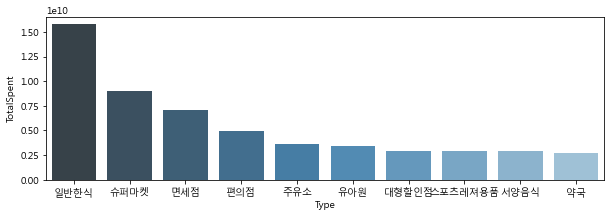

In [85]:
# 상위 10개에 대해 확인 
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
f_path= "C:/Windows/Fonts/malgun.ttf"
font_name= font_manager.FontProperties(fname=f_path).get_name()
rc('font', family =font_name)
plt.rc('font', family='Malgun Gothic')
import seaborn as sns



plt.figure(figsize=(10,3))
sns.barplot(x='Type', y ='TotalSpent', data=test[:10],palette = 'Blues_d')

In [87]:
# 서귀포시 대정읍 데이터 확인하기 

cond1 = df_final['SIGUNGU'] == '서귀포시'
cond2 = df_final['dong'].str.contains('대정읍')
df_reg_dje = df_final[cond1&cond2]
df_reg_dje.head(5)


,OBJECTID,Field1,YM,SIDO,SIGUNGU,FranClass,Type,Time,TotalSpent,DisSpent,NumofSpent,NumofDisSpent,POINT_X,POINT_Y,lon,lat,lon_lat,dong
299,10,10,202005,제주특별자치도,서귀포시,중소,편의점,00시,21420,0,1,0,878883.7242,1.473778e+06,126.19985908167523,33.24852786319628,126.19985908167523_33.24852786319628,대정읍
300,14704,14704,202005,제주특별자치도,서귀포시,중소,편의점,05시,8000,4690,1,1,878883.7242,1.473778e+06,126.19985908167523,33.24852786319628,126.19985908167523_33.24852786319628,대정읍
301,16405,16405,202005,제주특별자치도,서귀포시,중소,편의점,06시,114690,6000,11,1,878883.7242,1.473778e+06,126.19985908167523,33.24852786319628,126.19985908167523_33.24852786319628,대정읍
302,19143,19143,202005,제주특별자치도,서귀포시,중소,편의점,07시,169460,9500,15,1,878883.7242,1.473778e+06,126.19985908167523,33.24852786319628,126.19985908167523_33.24852786319628,대정읍
303,23388,23388,202005,제주특별자치도,서귀포시,중소,편의점,08시,311360,57400,34,6,878883.7242,1.473778e+06,126.19985908167523,33.24852786319628,126.19985908167523_33.24852786319628,대정읍


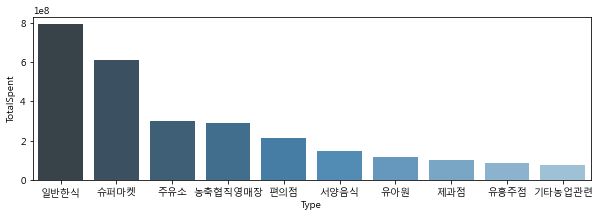

In [88]:
test2 = df_reg_dje.groupby(['Type']).sum()
test2 = test2.sort_values('TotalSpent', ascending=False)
test2 = test2.reset_index()


plt.figure(figsize=(10,3))
sns.barplot(x='Type', y ='TotalSpent', data=test2[:10],palette = 'Blues_d')

In [ ]:
# 